# CMSC 320 FINAL PROJECT: WHAT COUNTRY HAS THE GREATEST NATIONAL FOOTBALL(SOCCER) team_home?
Owners: Nathaniel Bekele and Mikias Atnafu

## Introduction:
First and foremost, we will be establishing what we believe to be the most important boundary for this project, we will be referring to the sport exclusively as football not soccer.

The data we will be using was compiled by Mart Jürisoo and is available on Kaggle: https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017?resource=download.

## Factors to be considered:
### Time period
This dataset has all the results of international football fixtures from 1872 to 2022. While it would be amazing to consider the data from 1872, we also thought of the possibility that it would be rather unfair on most countries that were colonized at the time and hence did not have a national team to compete with. Thus we will be limiting the data to 1976 to 2022 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Data Preprocessing
- Before we start our analysing about who is the greatest national football team, we need to preproces the data.
- So, lets first read the csv file as pandas dataframe as panda dataframe makes it eaiser to manipulate datasets.
- We have used two data set, The first one is the *international football result*, and the second one is the football *world cup summary*, which will help us to see who reached the final and who won the world cup over the years starting from 1975.    

### Reading the first data, *The international football result*

In [13]:
football_df = pd.read_csv('results.csv')


# Create column Year using the year in the date column
football_df['year'] = football_df['date'].str.extract('(\d\d\d\d)')


# Change column Year to type int
football_df['year'] = football_df['year'].astype(int)

# filter only the data with year >= 1975 
football_df = football_df[football_df['year'] >= 1975]

football_df.head() 


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
9353,1975-01-01,Cameroon,Guinea,1,0,Friendly,Yaoundé,Cameroon,False,1975
9354,1975-01-01,Iraq,Tunisia,0,0,Friendly,Baghdad,Iraq,False,1975
9355,1975-01-03,Bermuda,Suriname,2,5,Friendly,Hamilton,Bermuda,False,1975
9356,1975-01-05,Cuba,Canada,4,0,Friendly,Havana,Cuba,False,1975
9357,1975-01-09,Iraq,Libya,3,1,Friendly,Baghdad,Iraq,False,1975


### Reading the second data, *World Cup Summary*

In [14]:
# read the FIFA world cup summary and display the first 5 rows 
world_cup_summary = pd.read_csv('FIFA-World Cup Summary.csv')

# filters the dataset by taking the world cup after the year 1975 
world_cup_summary = world_cup_summary[world_cup_summary['YEAR'] >= 1975]
world_cup_summary.head()

,YEAR,HOST,CHAMPION,RUNNER UP,THIRD PLACE,TEAMS,MATCHES PLAYED,GOALS SCORED,AVG GOALS PER GAME
10,1978,Argentina,Argentina,Netherlands,Brazil,16,38,102,2.7
11,1982,Spain,Italy,West Germany,Poland,24,52,146,2.8
12,1986,Mexico,Argentina,West Germany,France,24,52,132,2.5
13,1990,Italy,West Germany,Argentina,Italy,24,52,115,2.2
14,1994,United States,Brazil,Italy,Sweden,24,52,141,2.7


## Tyding the data
The tournament column contains very many tornaments (177 to be specefic), for this project we will only focus on the world cup, so we will only be working with the worldcup tournament.
Also, to make the analysis convenient, we will add serval columns into our dataframe suchas Winning percentage, Number of losses, Number of matches played any a few others. Using these columns, we can better analysis the best national team. The code below will do just that, adding the necessary columns.  

In [15]:
# Filter only the FIFA World Cup tournment
FIFA_WC = football_df[football_df['tournament'] == 'FIFA World Cup'].copy()
FIFA_WC.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
10650,1978-06-01,Germany,Poland,0,0,FIFA World Cup,Buenos Aires,Argentina,True,1978
10651,1978-06-02,Argentina,Hungary,2,1,FIFA World Cup,Buenos Aires,Argentina,False,1978
10652,1978-06-02,France,Italy,1,2,FIFA World Cup,Mar del Plata,Argentina,True,1978
10653,1978-06-02,Mexico,Tunisia,1,3,FIFA World Cup,Rosario,Argentina,True,1978
10654,1978-06-03,Austria,Spain,2,1,FIFA World Cup,Buenos Aires,Argentina,True,1978


In the code below, we are going to group the dataset by the teams and create a column for the goal scored and goal conceeded for each team
The goal scored column will help us to see which team is good at attacking, whereas the goal conceeded tell us about the teams defense strength. For convenience we will combine the home_team and away_team so that we will have a new dataframe 
with only the necessary rows. There are two teams (El Salvador and Kuwait) that are in away_team but not in home team therefore, we don't consider this two teams when getting the team information from the home_team.

In [16]:

team_group_home = FIFA_WC.groupby(by='home_team')    # group the data by home_team
team_group_away = FIFA_WC.groupby(by='away_team')    # group the data by away_team

In [17]:
clean_data = {'country':[], 'win_percentage':[], 'match_played':[], 'match_won':[], 'match_lost':[],
              'goal_scored':[], 'goal_conceded':[], 'avg_goal_score_per_match':[]}

# add the team names of the home_team and away_team 
team_name = list(FIFA_WC['home_team'].unique())
team_name.extend(t for t in list(FIFA_WC['away_team'].unique()) if not t in team_name)

# iterate over each team and get the necessary information to create a new dataframe
for current_team in team_name:
    goal_scored = goal_conceded = 0
    if current_team != 'El Salvador' and current_team != 'Kuwait':
        team_home = team_group_home.get_group(current_team)    # a single team from a home_team  
        # number of time won while a home team
        num_won_home = len(team_home[team_home['home_score']  > team_home['away_score']])
        goal_scored = team_home['home_score'].sum() 
        goal_conceded = team_home['away_score'].sum() 
    else: # we found the two teams that are not in home_team
        num_won_home = 0
        team_home = []

    # a single team from an away_team
    team_away = team_group_away.get_group(current_team)         
    # number of time won while an away team
    num_won_away = len(team_away[team_away['away_score']  > team_away['home_score']])
    goal_scored += team_away['away_score'].sum()
    goal_conceded += team_away['home_score'].sum() 

    total_num_won = num_won_home + num_won_away
    total_num_played = len(team_home) + len(team_away)
    win_per =  total_num_won / total_num_played

    # append the row to the dictionary which later be converted to a dataframe
    clean_data['country'].append(current_team)
    clean_data['match_played'].append(total_num_played)
    clean_data['match_won'].append(total_num_won)
    clean_data['match_lost'].append(total_num_played - total_num_won)
    clean_data['win_percentage'].append(win_per)
    clean_data['goal_scored'].append(goal_scored)
    clean_data['goal_conceded'].append(goal_conceded)
    clean_data['avg_goal_score_per_match'].append(goal_scored / total_num_played)


# create a new dataframe using the clean data
tidy_data = pd.DataFrame(clean_data)
tidy_data.head()

,country,win_percentage,match_played,match_won,match_lost,goal_scored,goal_conceded,avg_goal_score_per_match
0,Germany,0.588235,68,40,28,126,62,1.852941
1,Argentina,0.576271,59,34,25,97,54,1.644068
2,France,0.551020,49,27,22,82,44,1.673469
3,Mexico,0.361111,36,13,23,41,48,1.138889
4,Austria,0.352941,17,6,11,17,21,1.000000


# Exploratory Analysis
- Now that we have the tidy data needed to do the analysis, lets do some exploratory analysis. In this phase, we will visualize some of the columns to see how the team performs overall.
- We can start by doing barplot of goal scored acrose the team. 
- Plotting this will help us to see (visually) who had a higher goal over the total match they played over the years.  


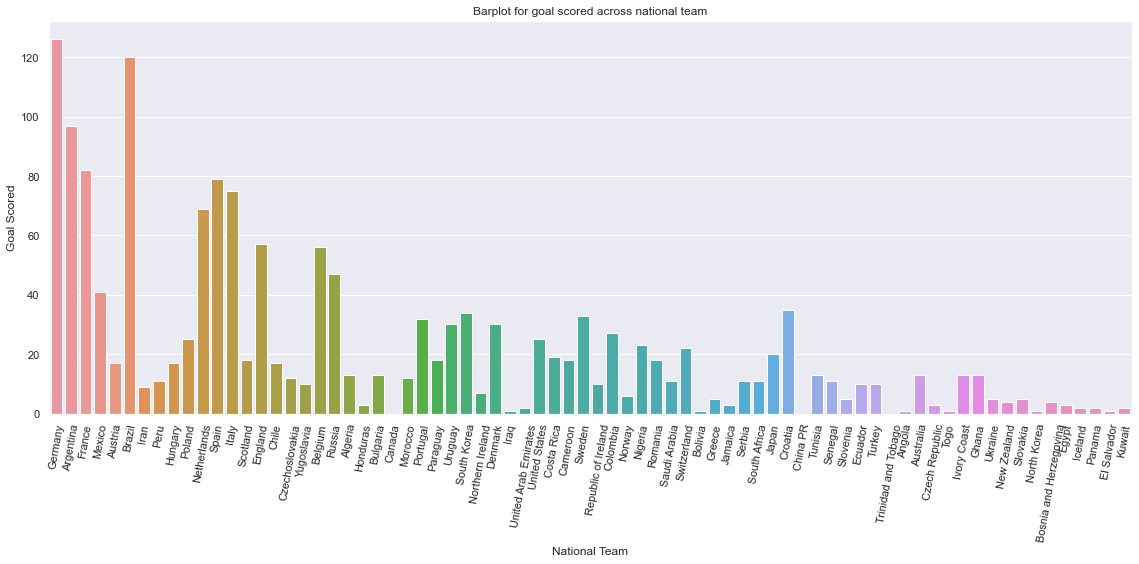

In [18]:
fig, axes = plt.subplots(figsize=(16,8))
axes = sns.barplot(data=tidy_data, x='country', y='goal_scored')
plt.xticks(rotation=80)
axes.set_title('Barplot for goal scored across national team')
axes.set_xlabel('National Team')
axes.set_ylabel('Goal Scored')
plt.tight_layout()

- From the above barplot, we can see that some of the national teams suchas Germany, Argentina, Brazil, and few others have scored very higher over the years. 
- This is a good starting points.
- Now that we visualize who who scored very high, lets see a scatter plot of the goal scored and winning percentage to check if the teams that scored very high have a high winning percentage (Which is what we expect because if a team goal socre very high, it is more likely that there winning percentage is very high). 
- To conform this we will do a reggression line over the scatter plot to see if there is relationship

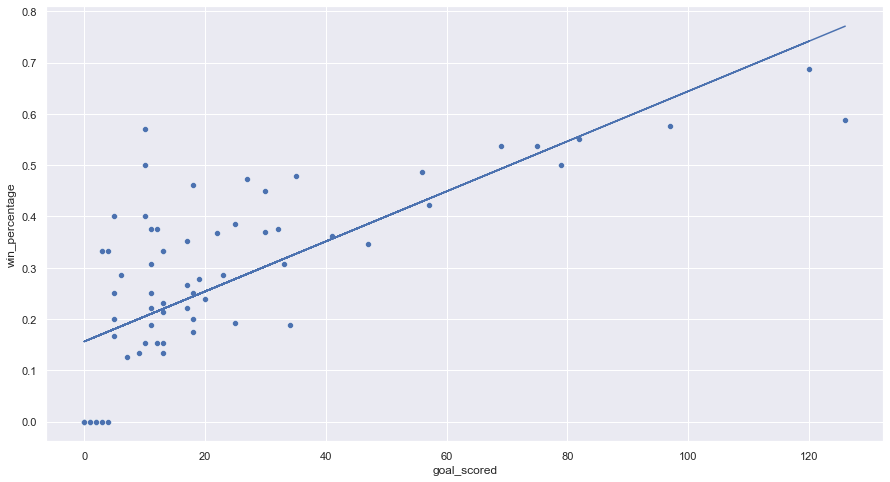

In [19]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.scatterplot(data=tidy_data, x='goal_scored',  y='win_percentage')
x= tidy_data['goal_scored']
y = tidy_data['win_percentage']
m, b = np.polyfit(x, y, 1)
ax.plot(x, m*x+b)
plt.show()

- As we can see from the above scatter plot, there is a good relationship between goal_scored and win_percentage. 
- The relationship between this two variables shine when the goal score is getter higher and higher.
- Between goal score 0 to 40, the relationship doesn't seem so great. We start seeing the effect of goal scored as the score gets higher. 
- To check the overall relationship, we checked the correlation betwenn goal scored and win_percentage below and found approximatly a 72% relationship between the two variables, which is good overall.    

In [20]:
# Pearson correlation between x=goal scored and y=winning percentage
np.corrcoef(x, y)[0,1]

0.7180720480872174

- Now that we checked the relationship between goal scored and winning percentage, let see the distribution of winning percentage accross all national teams. 
- We want to do this because we would like to know which team has a higher winning percentage.
- Later in our analysis, we would like to narrow down the teams by taking the top ten national team, so knowing the teams who has highest winning percentage will help us to do that

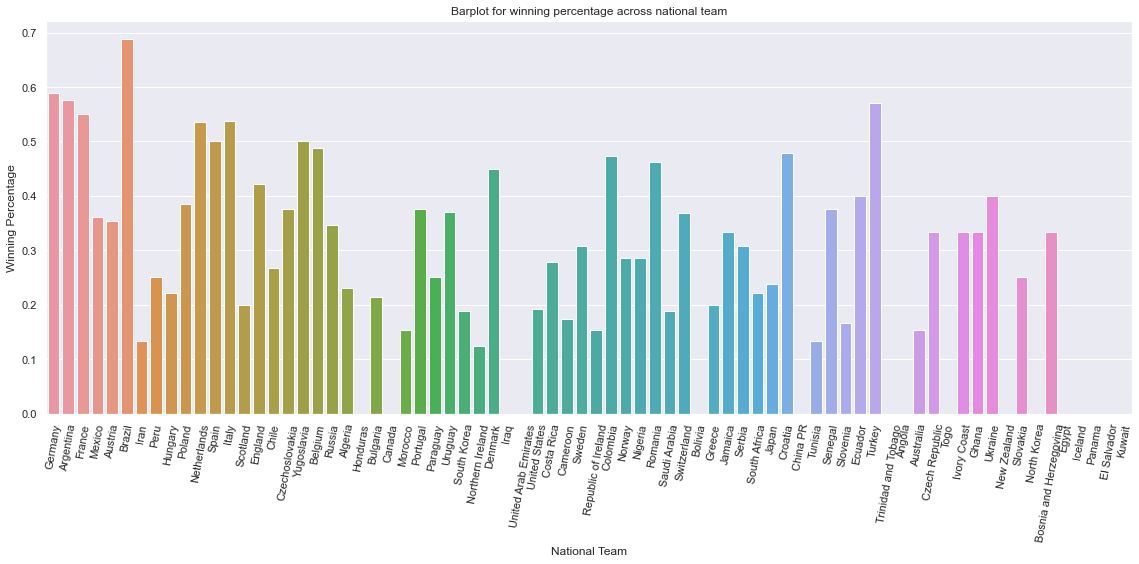

In [21]:
fig, axes = plt.subplots(figsize=(16,8))
axes = sns.barplot(data=tidy_data, x='country', y='win_percentage')
plt.xticks(rotation=80)
axes.set_title('Barplot for winning percentage across national team')
axes.set_xlabel('National Team')
axes.set_ylabel('Winning Percentage')
plt.tight_layout()

- Alright, so far so good, as we can see from the above barplot, the team that scored higher(check the above two plots) have higher winning percentage. For instance Germany and Brazil had a very high goal score(126 and 120 respectivly). 
- As we can see in the barplot, Brazil and Germany has higher winning percentage(Argentina, France, and Turkey has also higher winning percentage relatively). We will use this information and a few other to take the top 10 teams then we will apply other metrics, such as number of time they reach world cup final, or who won the world cup, to distinguish the top national team. 

In [24]:
# rank the teams based on the highest goals scored and winning percentage
tidy_data.sort_values(by=['goal_scored', 'win_percentage'], ascending=False, inplace=True)
# Print the first 10 rows of the dataframe
tidy_data.head(10)

,country,win_percentage,match_played,match_won,match_lost,goal_scored,goal_conceded,avg_goal_score_per_match
0,Germany,0.588235,68,40,28,126,62,1.852941
5,Brazil,0.687500,64,44,20,120,52,1.875000
1,Argentina,0.576271,59,34,25,97,54,1.644068
2,France,0.551020,49,27,22,82,44,1.673469
11,Spain,0.500000,48,24,24,79,49,1.645833
12,Italy,0.537037,54,29,25,75,43,1.388889
10,Netherlands,0.536585,41,22,19,69,39,1.682927
14,England,0.422222,45,19,26,57,36,1.266667
18,Belgium,0.487179,39,19,20,56,47,1.435897
19,Russia,0.346154,26,9,17,47,33,1.807692
